In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv("./data_2000_2019.csv")

# Entendendo o conjunto de dados

In [3]:
df.shape


(133920, 26)

<h2>Tamanho do conjunto de dados:</h2>
<p>O conjunto de dados possui <b>133920 linhas</b> (dados) e <b>26 atributos</b></p>

In [4]:
df.columns

Index(['micro_code', 'micro_name', 'micro_name_ibge', 'meso_code', 'meso_name',
       'state_code', 'state_name', 'region_code', 'region_name', 'biome_code',
       'biome_name', 'ecozone_code', 'ecozone_name', 'main_climate', 'month',
       'year', 'time', 'dengue_cases', 'population', 'pop_density', 'tmax',
       'tmin', 'pdsi', 'urban', 'water_network', 'water_shortage'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133920 entries, 0 to 133919
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   micro_code       133920 non-null  int64  
 1   micro_name       133920 non-null  object 
 2   micro_name_ibge  133920 non-null  object 
 3   meso_code        133920 non-null  int64  
 4   meso_name        133920 non-null  object 
 5   state_code       133920 non-null  int64  
 6   state_name       133920 non-null  object 
 7   region_code      133920 non-null  int64  
 8   region_name      133920 non-null  object 
 9   biome_code       133920 non-null  int64  
 10  biome_name       133920 non-null  object 
 11  ecozone_code     133920 non-null  int64  
 12  ecozone_name     133920 non-null  object 
 13  main_climate     133920 non-null  object 
 14  month            133920 non-null  int64  
 15  year             133920 non-null  int64  
 16  time             133920 non-null  int6

<h2>Análise - Removendo dados nulos</h2>
<p>O conjunto de dados é formado por dados do tipo numérico e 'object' que é texto. Além disso há alguns atributos que possuem menos valores que são 'dengue_cases', 'population' e 'pop_density'. Logo concluímos que esses atributos tem dados faltantes.</p>

In [5]:
df_nulos = pd.DataFrame({'Colunas': df.columns, 'Tipos': df.dtypes, 'Percentual nulos': round(df.isnull().sum()/df.shape[0], 2)})
print("Percentual de dados nulos de cada atributo do dataframe")
df_nulos

Percentual de dados nulos de cada atributo do dataframe


,Colunas,Tipos,Percentual nulos
micro_code,micro_code,int64,0.00
micro_name,micro_name,object,0.00
micro_name_ibge,micro_name_ibge,object,0.00
meso_code,meso_code,int64,0.00
meso_name,meso_name,object,0.00
state_code,state_code,int64,0.00
state_name,state_name,object,0.00
region_code,region_code,int64,0.00
region_name,region_name,object,0.00
biome_code,biome_code,int64,0.00


Como o percentual de dados nulos desse atributo é baixo, 0.05% vamos remover essas linhas com dados nulos.

In [6]:
df = df.dropna(axis=0, how='any', subset=None, inplace=False)
print(df.shape)

(126996, 26)


Removemos os dados nulos e de 133920 linhas passamos para 126996 linhas

In [7]:
df.head()

,micro_code,micro_name,micro_name_ibge,meso_code,meso_name,state_code,state_name,region_code,region_name,biome_code,...,time,dengue_cases,population,pop_density,tmax,tmin,pdsi,urban,water_network,water_shortage
6696,11001,Porto Velho,PORTO VELHO,1101,Madeira-Guaporé,11,Rondônia,1,North,5,...,13,267.0,426640.0,6.503234,30.180363,21.471796,-0.311743,85.20,33.57,0.2245
6697,11002,Guajar<e1>-Mirim,GUAJARÁ-MIRIM,1101,Madeira-Guaporé,11,Rondônia,1,North,5,...,13,12.0,61321.0,1.504577,30.369087,21.300480,-0.803746,72.31,27.43,0.0873
6698,11003,Ariquemes,ARIQUEMES,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,13,2.0,143809.0,5.903734,30.084492,21.183846,-0.022145,66.91,27.76,0.1871
6699,11004,Ji-Paran<e1>,JI-PARANÁ,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,13,93.0,306896.0,12.241386,29.946037,20.736881,-0.269979,68.68,32.23,0.2381
6700,11005,Alvorada D'Oeste,ALVORADA D'OESTE,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,13,1.0,74460.0,4.658250,29.965841,20.655041,-1.247326,42.82,21.40,0.2837


<h2>Análise - Seleção de atributos</h2>
<p> Percebemos que alguns atributos não fazem sentido na nossa análise, como código da região, código de estado, etc. Por isso vamos remover eles do dataset e selecionar somente os atributos relevantes para nosso análise.</p>

In [8]:
df = df[['micro_name_ibge', 'state_name', 'region_name', 'biome_name', 'ecozone_name', 'main_climate', 'month', 'year', 'dengue_cases', 'population', 'pop_density', 'tmax', 'tmin', 'pdsi', 'urban', 'water_network', 'water_shortage']]
df.columns = ['nome', 'estado', 'regiao', 'bioma', 'ecozona', 'clima_principal', 'mes', 'ano', 'casos_dengue', 'populacao', 'densidade_populacional', 'temp_max', 'temp_min', 'pdsi', 'pop_urbana', 'rede_agua', 'escassez_agua']

In [10]:
df.head()

,nome,estado,regiao,bioma,ecozona,clima_principal,mes,ano,casos_dengue,populacao,densidade_populacional,temp_max,temp_min,pdsi,pop_urbana,rede_agua,escassez_agua
6696,PORTO VELHO,Rondônia,North,Amazon,Amazon,AM,1,2001,267.0,426640.0,6.503234,30.180363,21.471796,-0.311743,85.20,33.57,0.2245
6697,GUAJARÁ-MIRIM,Rondônia,North,Amazon,Amazon,AM,1,2001,12.0,61321.0,1.504577,30.369087,21.300480,-0.803746,72.31,27.43,0.0873
6698,ARIQUEMES,Rondônia,North,Amazon,Amazon,AM,1,2001,2.0,143809.0,5.903734,30.084492,21.183846,-0.022145,66.91,27.76,0.1871
6699,JI-PARANÁ,Rondônia,North,Amazon,Amazon,AM,1,2001,93.0,306896.0,12.241386,29.946037,20.736881,-0.269979,68.68,32.23,0.2381
6700,ALVORADA D'OESTE,Rondônia,North,Amazon,Amazon,AM,1,2001,1.0,74460.0,4.658250,29.965841,20.655041,-1.247326,42.82,21.40,0.2837


In [11]:
df.shape

(126996, 17)

<h2>Análise de dados estatísticos</h2>

In [12]:
df.describe()

,mes,ano,casos_dengue,populacao,densidade_populacional,temp_max,temp_min,pdsi,pop_urbana,rede_agua,escassez_agua
count,126996.000000,126996.000000,126996.000000,1.269960e+05,126996.000000,126996.000000,126996.000000,126996.000000,126996.000000,126996.000000,126996.000000
mean,6.500000,2010.000000,101.531977,3.457771e+05,102.402926,29.443001,18.999141,-0.474734,72.048097,72.244883,0.357624
std,3.452066,5.477247,972.055442,8.884889e+05,365.813875,3.457792,3.634724,1.918272,16.603086,17.007526,0.240737
min,1.000000,2001.000000,0.000000,1.696600e+04,0.227461,14.425291,4.852744,-7.634145,22.300000,16.680000,0.000000
25%,3.750000,2005.000000,0.000000,1.017920e+05,12.381314,27.576033,16.937829,-1.769722,58.390000,62.680000,0.160100
50%,6.500000,2010.000000,4.000000,1.738980e+05,31.736761,30.189419,19.906584,-0.597289,72.700000,74.850000,0.327400
75%,9.250000,2015.000000,29.000000,3.051500e+05,62.912773,31.800734,21.786750,0.708979,86.540000,85.580000,0.531700
max,12.000000,2019.000000,88821.000000,1.504189e+07,6374.149599,37.885544,25.765200,7.479940,99.930000,98.810000,1.000000


<p>Apesar da descrição do conjunto de dados dizer que os dados eram dos anos 2000 até 2019, precebemos que no atributo ano o mínimo é 2001 e o máximo 2019. De 2001 até 2010 estão concentrados metade de todo nosso conjunto de dados e a maior parte dos dados vai até 2015.</p>
<p>Analisando o atributo casos de dengue, observamos que a grande maioria dos dados tem o valor menor que 29 no campo casos de dengue. E a média da quantidade de casos no Brasil de 2001 à 2019 foi de 101,5.</p>
<p>Os atributos temperatura minima e máxima tem a maioria dos valores menores que 21,8 e 31,8 e com média de 18,9 e 29,4 respectivamente</p>

<h2>Definição de funções</h2>
<p>Funções utilizadas para plotagem de gráficos e agrupamento de atributos</p>

In [13]:
def histograma(atb, title):
    plt.figure(figsize=(15,8))
    plt.hist(data=df, x = atb, bins=50)
    plt.title(title)
    plt.show()

In [14]:
def grafico_barras(df, eixo_x, eixo_y, title):
    plt.figure(figsize=(15,8))
    #custom_colors = ["#949392"]
    #plt.xticks(rotation=45)
    plt.title(title)
    # Define uma rotação de 45 graus para caber os nomes dos atributos no eixo x
    plt.xticks(rotation=45)
    #sns.barplot(data=df, x=eixo_x, y=eixo_y, palette=custom_colors)
    sns.barplot(data=df, x=eixo_x, y=eixo_y)

In [15]:
def agrupar(df, feature_one, feature_two):
    '''
        Ao agrupar os dados ele realiza uma soma dos dados numericos. Por exemplo ao agrupar a temperatura pelos estados
        ele realiza a soma de todas as temperaturas do estado do amazonas e assim define a temperatura para o amazonas.
    '''
    
    agrupado =  df.groupby(feature_one)[feature_two].sum()
    return agrupado.reset_index()

In [16]:
def agrupar_pela_media(df, feature_one, feature_two):
    agrupado =  df.groupby(feature_one)[feature_two].mean()
    return agrupado.reset_index()

In [17]:
def grafico_correlacao(df, atributos, titulo):
    plt.figure(figsize=(10,6))
    sns.heatmap(df[atributos].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(titulo)
    plt.show()

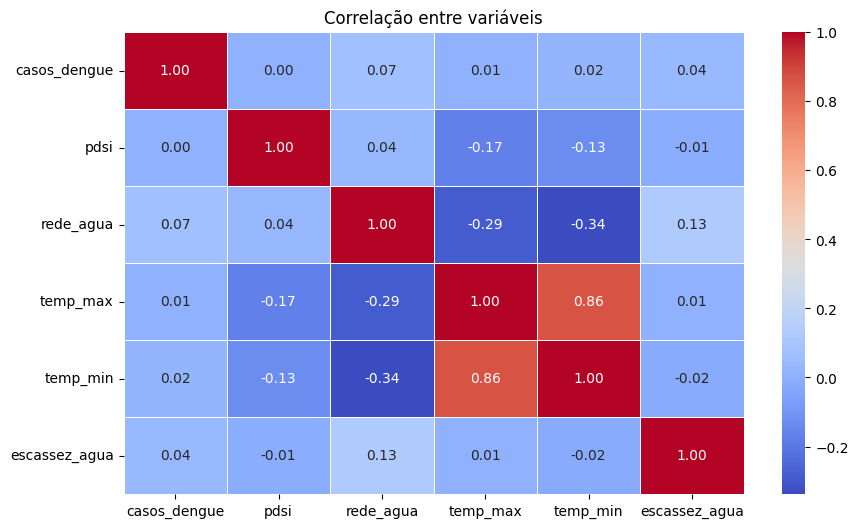

In [18]:
grafico_correlacao(df, ['casos_dengue', 'pdsi', 'rede_agua', 'temp_max', 'temp_min', 'escassez_agua'], "Correlação entre variáveis")

<h2>Análise da correlação dos atributos</h2>
<p>Os casos de dengue não se relacionam fortemente com nenhuma outra variável. Entretanto percebemos que a temperatura mínima se relaciona fortemente com a rede de água, assim como pdsi se relaciona com temperatura mínima e máxima.</p>

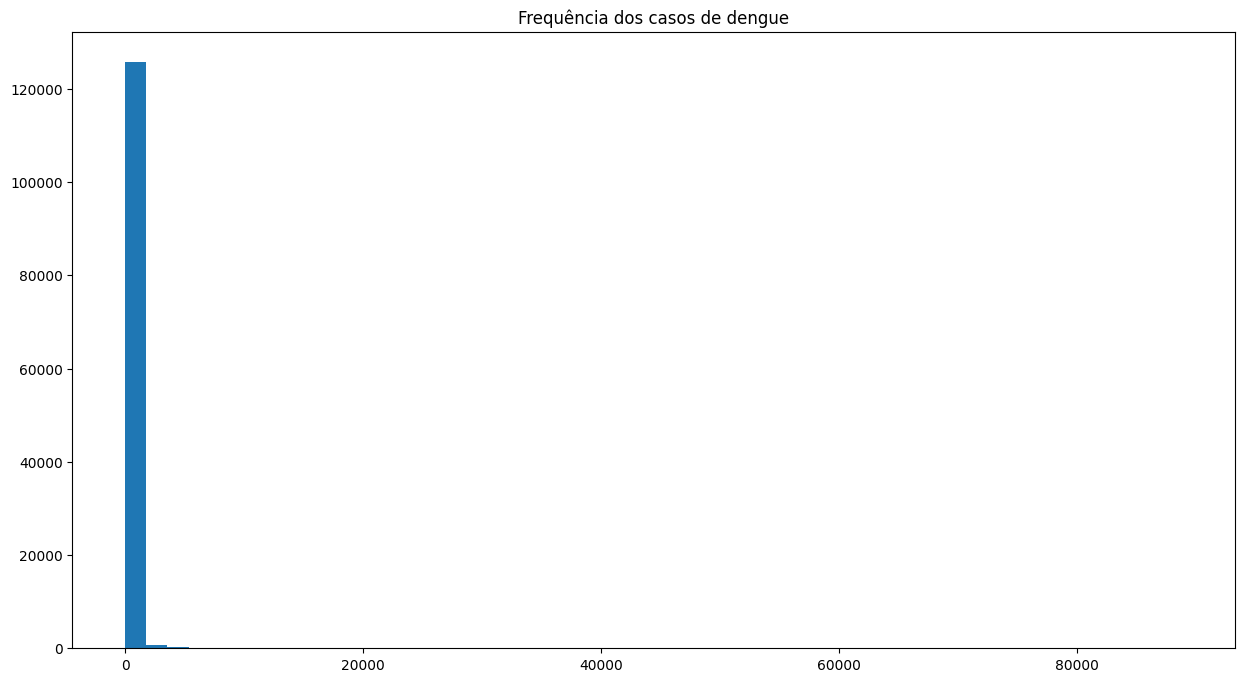

In [19]:
histograma('casos_dengue', 'Frequência dos casos de dengue')

<h2>Análise</h2>
<p>A maioria dos dados possui valor zero no atributo de casos de dengue, por isso vemos uma barra maior bem próxima ao valor zero do histograma.</p>

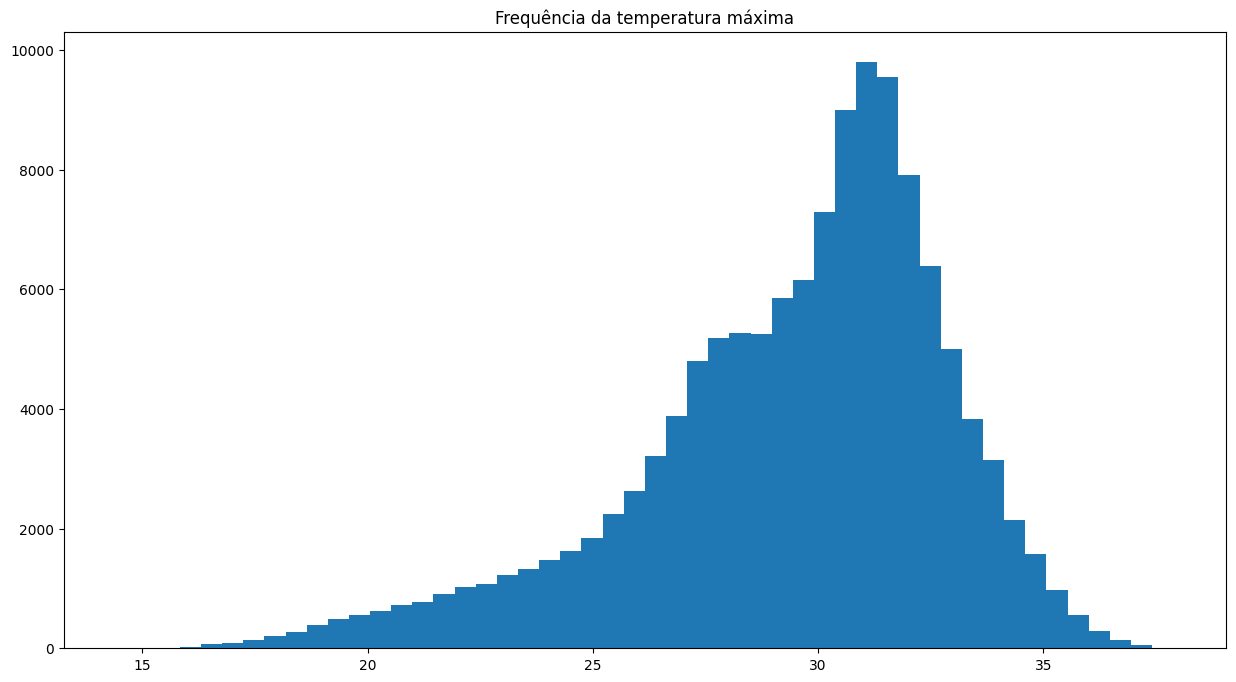

In [20]:
histograma('temp_max', 'Frequência da temperatura máxima')

<h2>Análise</h2>
<p>No Brasil temos uma maior frequência de ocorrência de temperaturas máximas entre 30ºC e 35ºC</p>

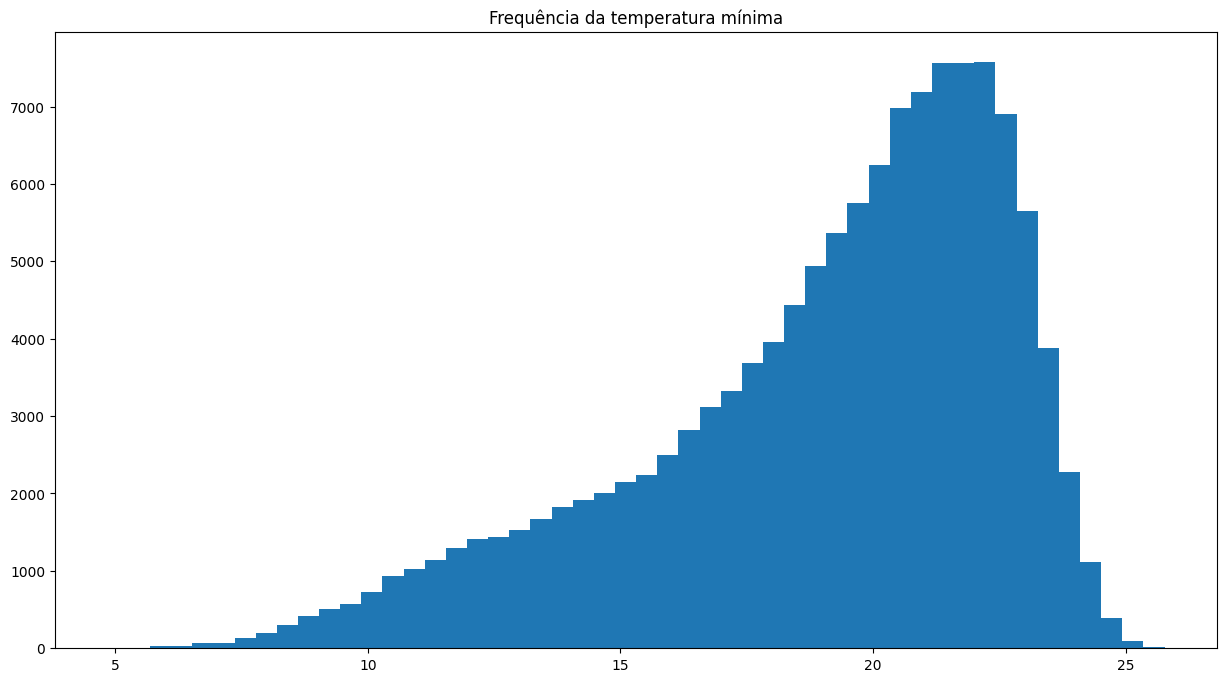

In [21]:
histograma('temp_min', 'Frequência da temperatura mínima')

<h2>Análise</h2>
<p>No Brasil temos uma frequência maior entre 20ºC e 25ºC de temperatura mínima.</p>

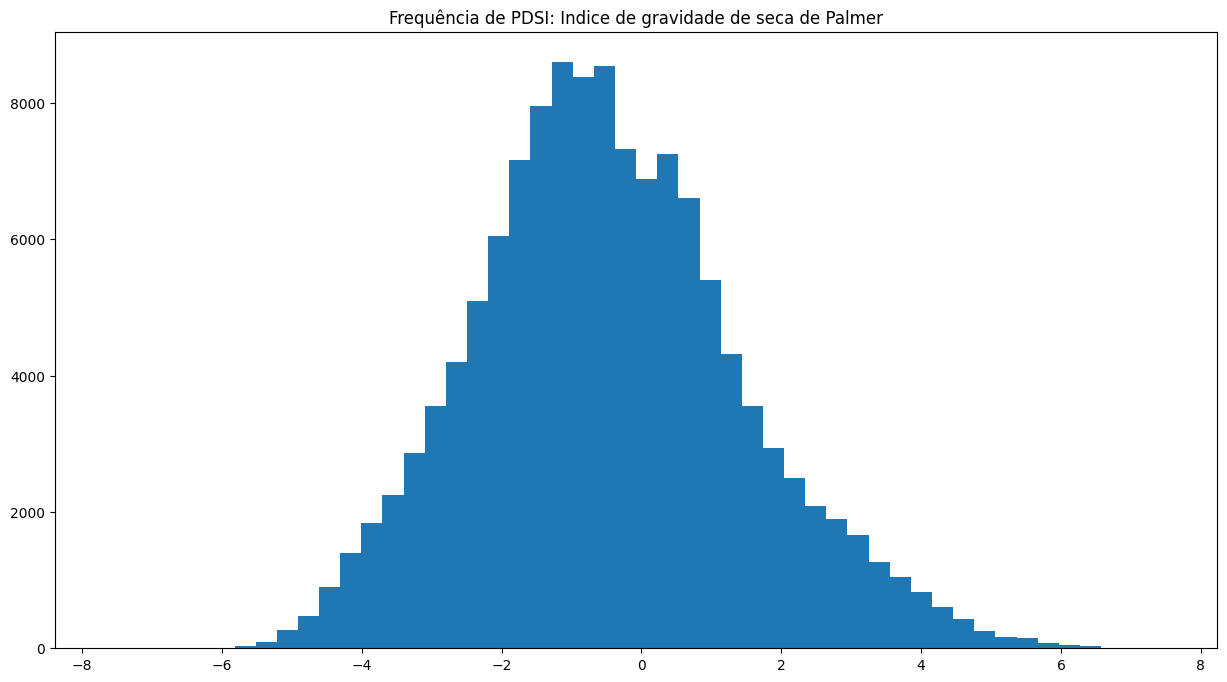

In [22]:
histograma('pdsi', 'Frequência de PDSI: Indice de gravidade de seca de Palmer')

<h2>Análise</h2>
<p>PDSI é um índice definido por Palmer em 1965 que diz que a seca é o intervalo de tempo, geralmente da ordem de meses ou até anos, durante o qual o abastecimento hídrico de uma região cai consideravelmente em relação ao "climatologicamente" esperado ou apropriado. </p>
<table>
    <tr> 
        <td>PDSI</td>
        <td>Classificação</td>
    </tr>
    <tr> 
        <td>>= 4,00</td>
        <td>Extremamente úmido</td>
    </tr>
    <tr> 
        <td>3,00 a 3,99</td>
        <td>Umidade alta</td>
    </tr>
    <tr> 
        <td>2,00 a 2,99</td>
        <td>Umidade moderada</td>
    </tr>
    <tr> 
        <td>1,00 a 1,99</td>
        <td>Umidade baixa</td>
    </tr>
    <tr> 
        <td>0,50 a 0,99</td>
        <td>Umidade inicial</td>
    </tr>
    <tr> 
        <td>0,49 a -0,49</td>
        <td>Normal</td>
    </tr>
    <tr> 
        <td>-0,50 a -0,99</td>
        <td>Seca inicial</td>
    </tr>
    <tr> 
        <td>-1,00 a -1,99</td>
        <td>Seca suave</td>
    </tr>
    <tr> 
        <td>-2,00 a -2,99</td>
        <td>Seca moderada</td>
    </tr>
    <tr> 
        <td>-3,00 a -3,99</td>
        <td>Seca severa</td>
    </tr>
    <tr> 
        <td><= -4,00</td>
        <td>Seca extrema</td>
    </tr>
</table>

<p>Observando o histograma percebemos que a maioria dos índices reportados no Brasil estão entre -2 e 0, classificando nosso país entre uma seca normal e uma seca moderada.</p>
<p>Foi usado como referência os seguintes artigos:</p>
<p>Ashok K. Mishra, Vijay P. Singh,
A review of drought concepts,
Journal of Hydrology,
Volume 391, Issues 1–2,
2010,
Pages 202-216,
ISSN 0022-1694,
https://doi.org/10.1016/j.jhydrol.2010.07.012.
(https://www.sciencedirect.com/science/article/pii/S0022169410004257)</p>

<p>(https://repositorio.ufpe.br/bitstream/123456789/47067/1/GABRIEL%20VIEIRA%20DE%20MELO%20FAEIRSTEIN-AVALIA%C3%87%C3%83O%20DO%20%C3%8DNDICE%20DE%20SEVERIDADE%20DE%20SECA%20DE%20PALMER%20%28PDSI%29%20ATRAV%C3%89S%20DE%20PLANILHA%20ELETR%C3%94NICA.pdf)</p>

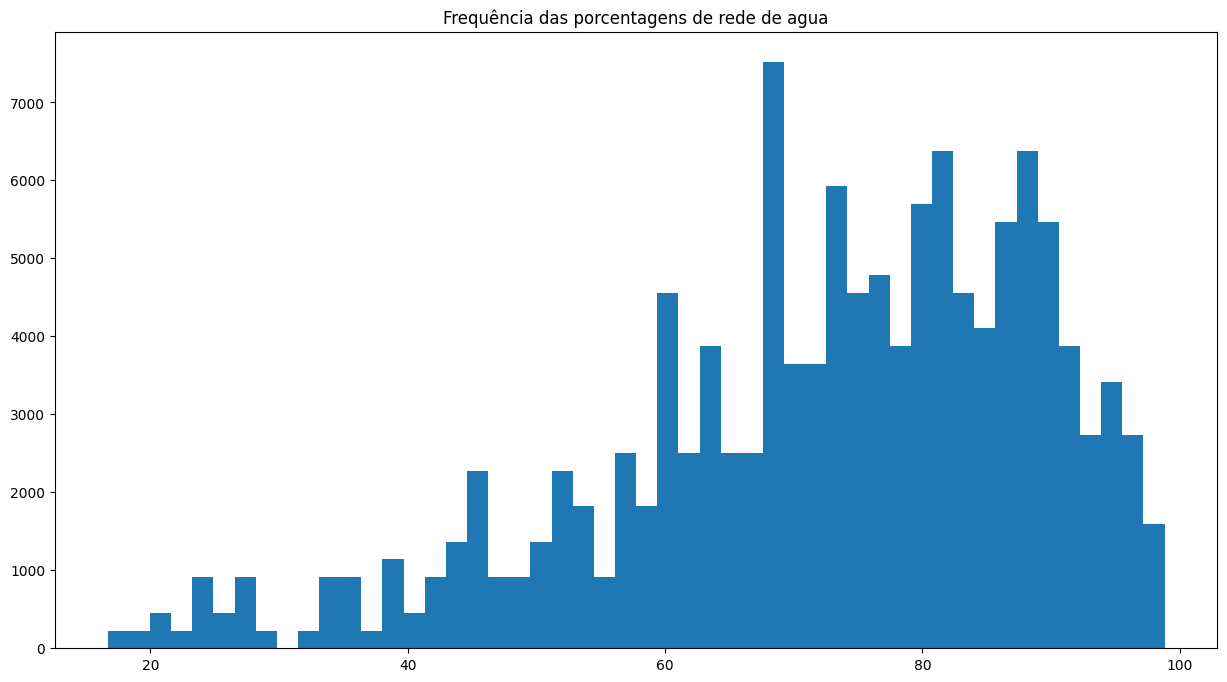

In [23]:
histograma('rede_agua', 'Frequência das porcentagens de rede de agua')

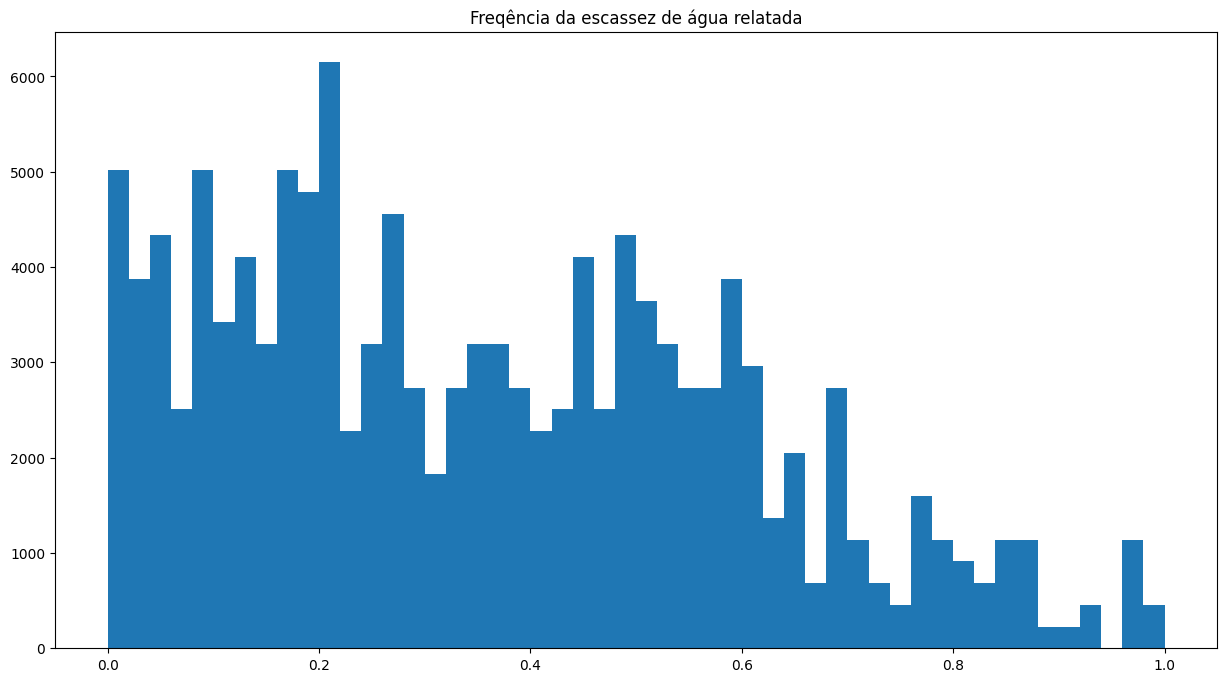

In [24]:
histograma('escassez_agua', 'Freqência da escassez de água relatada')

<h2>Análise</h2>
<p>Pelos histogramas "porcentagens de rede de água" e "escassez de água relatada", podemos concluir que no Brasil temos rede de água presente na grande maioria do país, uma vez que a maior frequência dos dados estão entre 60% e 100% e uma escassez relatada relativamente baixa, a maioria dos valores estão entre 0 à 0.6.</p>

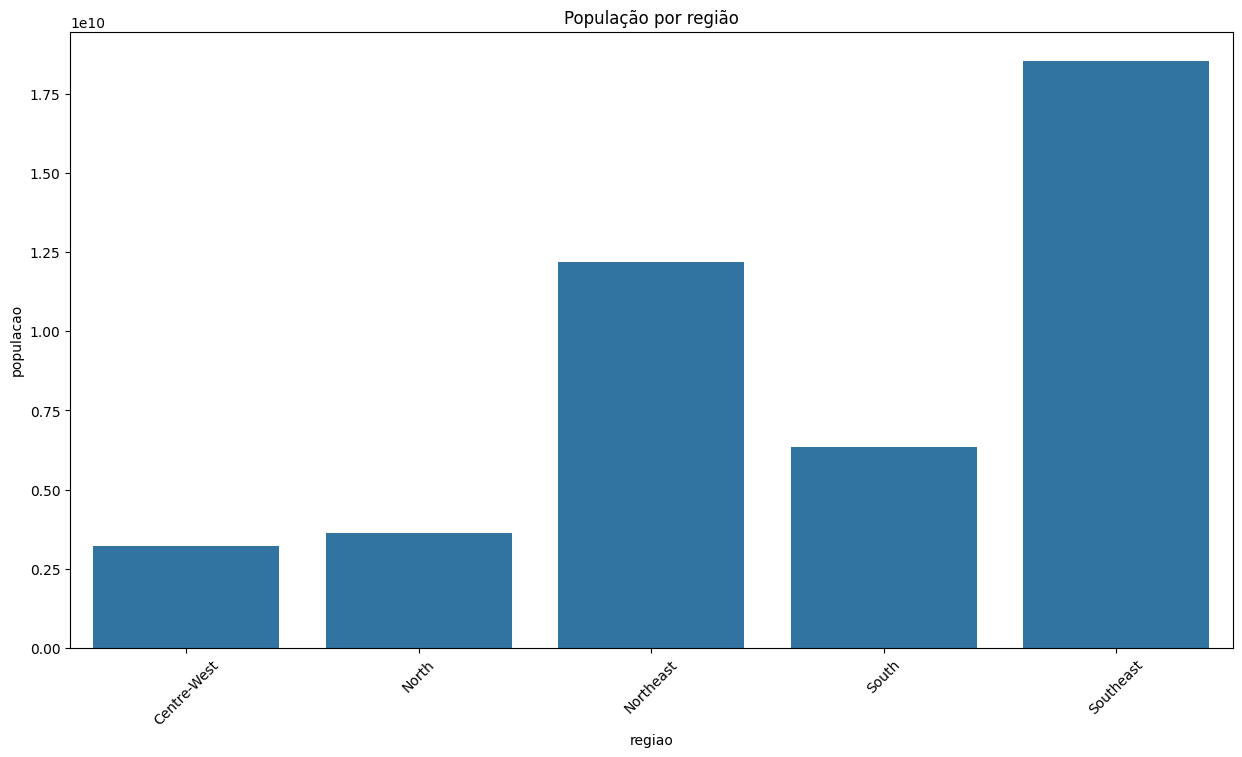

In [25]:
df_populacao = agrupar(df, 'regiao', 'populacao')
grafico_barras(df_populacao, 'regiao', 'populacao', 'População por região')

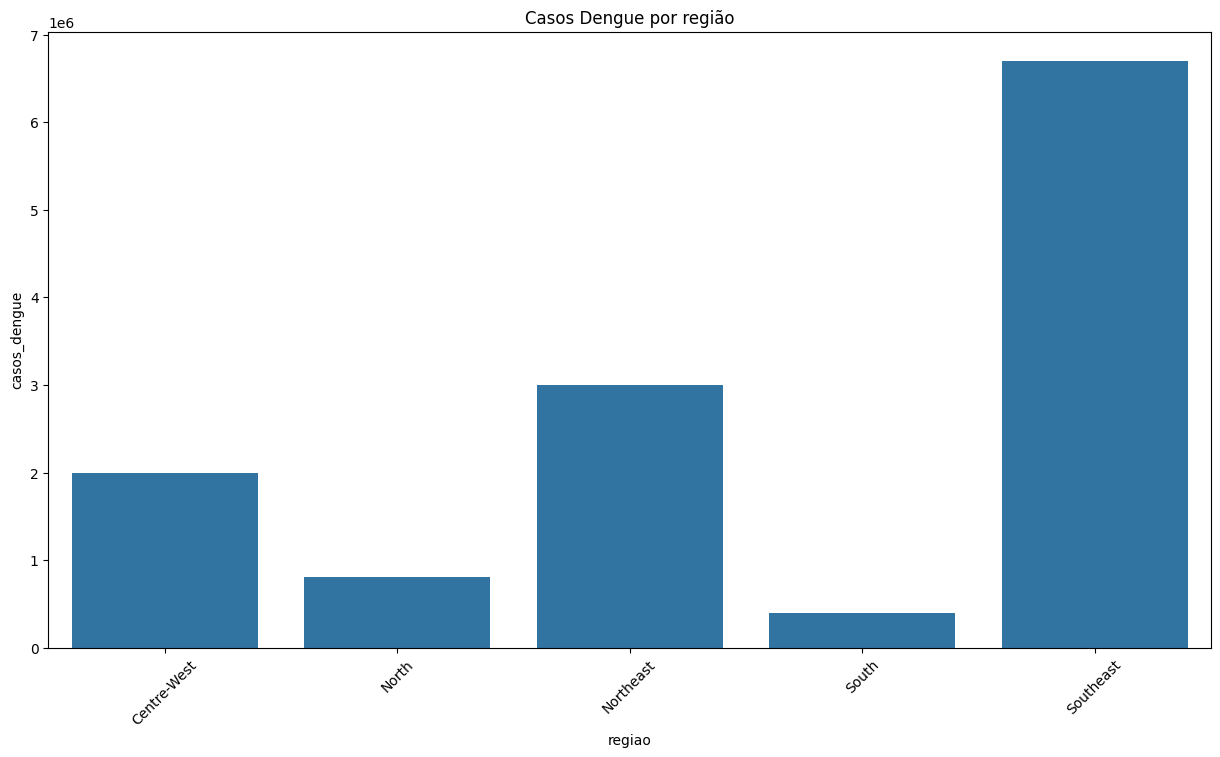

In [26]:
df_casos = agrupar(df, 'regiao', 'casos_dengue')
grafico_barras(df_casos, 'regiao', 'casos_dengue', 'Casos Dengue por região')

<h2>Análise</h2>
<p>Nosso senso comum imagina que regiões com maior população terão maior número de casos, e isso é confirmado pelos dados.</p>
<p>A região sudeste com maior população é a região com maior número de casos, seguido pela região nordeste. Porém a região Sul com a terceira maior população, não é a terceira região em número de casos de dengue e sim a região com menor número de casos de dengue.</p>

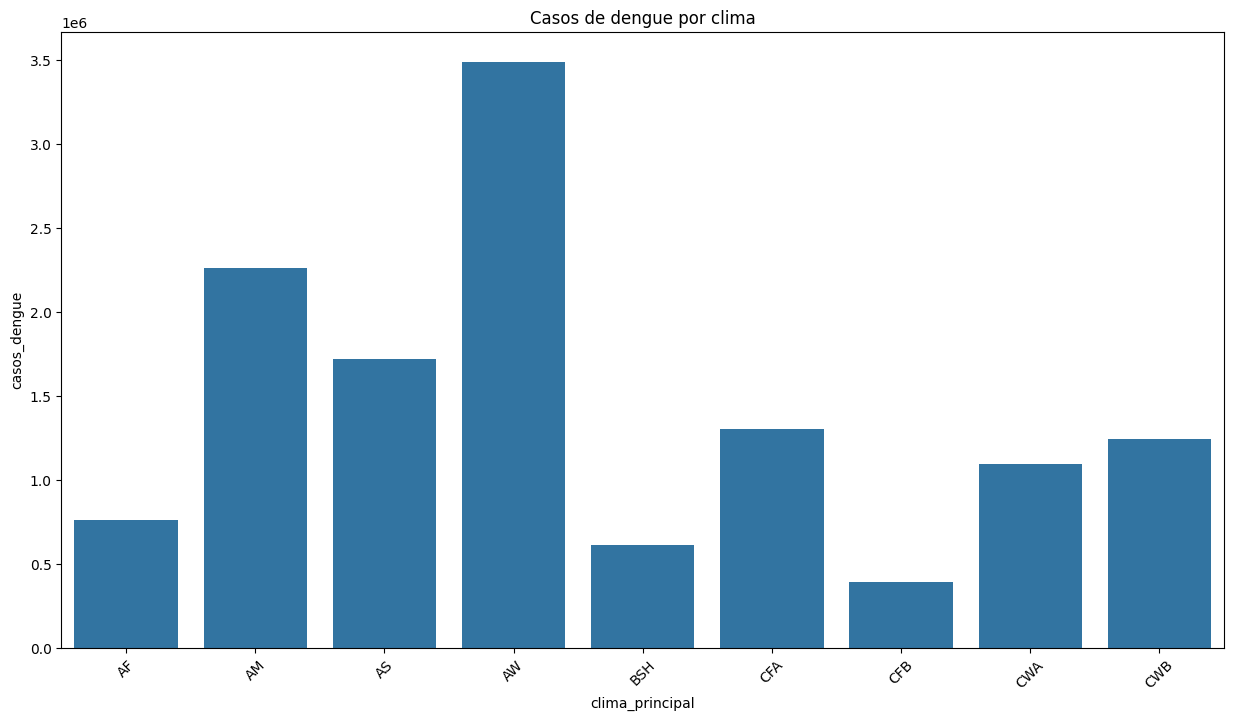

In [27]:
df_clima = agrupar(df, 'clima_principal', 'casos_dengue')
grafico_barras(df_clima, 'clima_principal', 'casos_dengue', 'Casos de dengue por clima')

<h1>Classificação climática de Köppen-Geiger</h1>
<ul>
<li>AF: Clima equatorial</li>
<li>AM: Clima de Monção</li>
<li>AS: Clima de savana</li>
<li>AW: Clima de savana</li>
<li>BSH: Clima semiárido quente</li>
<li>CFA: Clima subtropical úmido</li>
<li>CFB: Clima oceânico temperado</li>
<li>CWA: Clima subtropical úmido</li>
<li>CWB: Clima subtropical de altitude</li>
</ul>

<h2>Análise da quantidade de casos de dengue por clima</h2>
<p>Podemos observar no gráfico acima que o maior número de casos de dengue ocorre em regiões de clima de Savana, seguido pelo clima de Monção, e o Subtropical úmido.</p>
<h3>Clima de Savana</h3>
<p>Áreas que apresentam esse bioma, possui um clima que varia entre o tropical e o semiárido. Isso quer dizer que há uma alternância entre períodos chuvosos que ocorrem no verão e períodos de estiagem no outono e inverno. O índice pluviométrico anual varia entre 800mm a 1500mm </p> 
<h3>Clima de Monções</h3>
<p>Esse tipo climático é caracterizado pela alternância entre uma estação seca e outra chuvosa. Apresentando verões quentes e chuvosos e invernos com temperaturas amenas e clima seco. Sua pluviosidade anual pode ultrapassar os 2000mm, chegando até 4000mm</p>
<h3>Clima subtropical</h3>
<p>Já em regiões onde predomina o esse tipo climático temos chuvas bem distribuídas ao longo do ano, tendo ausência de uma estação seca. O nível pluviométrico varia entre 1500mm a 2000mm</p>

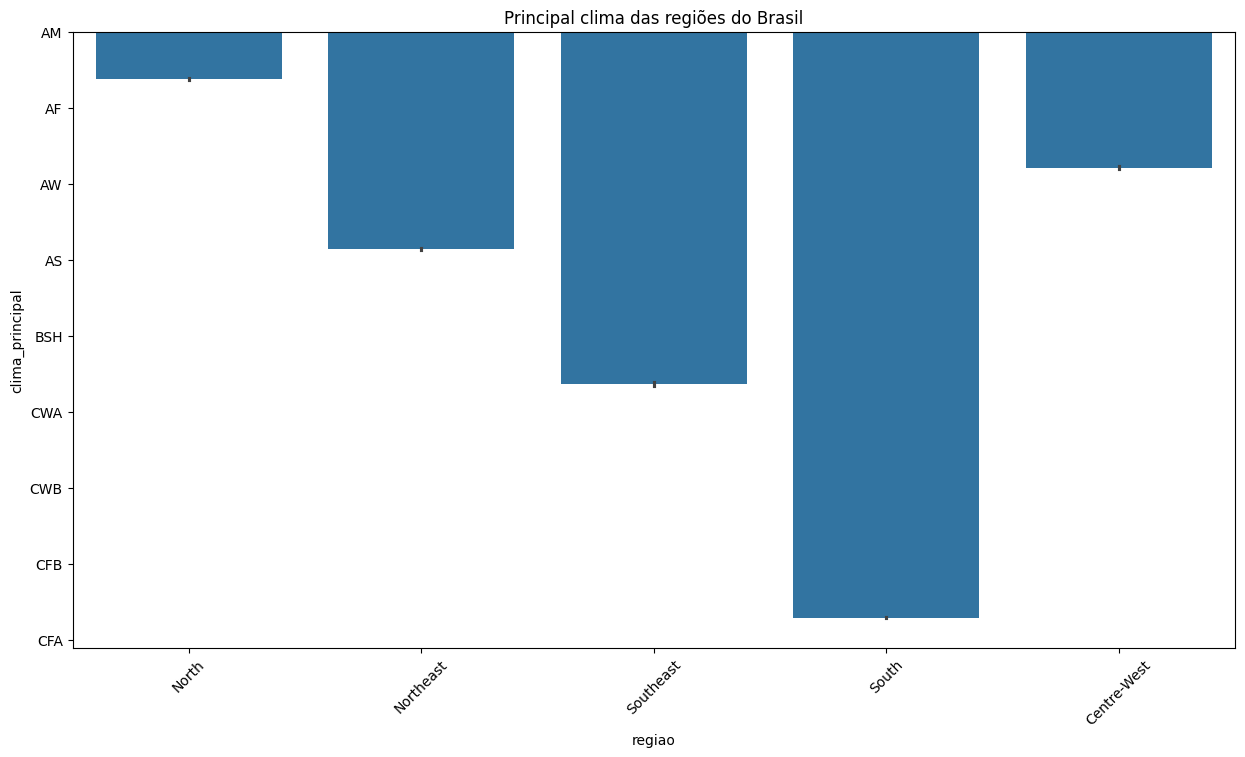

In [28]:
#grafico_barras(df, 'regiao', 'clima_principal', 'Clima das regiões')
grafico_barras(df, 'regiao', 'clima_principal', 'Principal clima das regiões do Brasil')

<h2>Análise</h2>
<p>A região sudeste que possui maior número de casos tem predominância do clima subtropical úmido e semiárido quente. Esses climas, principalmente o subtropical é caracterizado por um grande volume de chuvas e altas temperaturas, o que justificaria o alto número de casos</p>
<p>Já a região sul que tem o menor número de casos tem predominância dos climas subtropical e oceânico temperado. Climas que possui como característica grandes volumes de chuva. Comparando com a região sudeste que possui um clima muito parecido com grandes volumes de chuva, vemos uma discrepância. Por que uma tem ocorrência da maior quantidade de casos de dengue enquanto a outra tem o menor número de casos?</p>
<p>Já vimos que o clima de ambas é muito semelhante. E a região sul é a terceira maior em população. Podemos concluir que o clima não é o único fator que influência no número de casos de dengue.</p>
<p>Contudo, ao analisar os climas com maior ocorrência em casos de dengue vemos que são o clima de Savana, com maior número de ocorrência de casos de dengue, seguido do clima de Monção. As regiões com predominância desses climas são as regiões Centro-oeste, Norte e Nordeste e as regiões com maior índice de casos de dengue são Sudeste em primeiro lugar, seguido do nordeste e centro-oeste. Duas das regiões com maior número de casos de dengue tem como clima principal os climas com maior ocorrência de casos de dengue.</p>
<p>O que podemos concluir é que o clima é um fator importante que determina os elevados números de casos nessas regiões, entretando esse não é o único fator responsável pelos casos de dengue.</p>

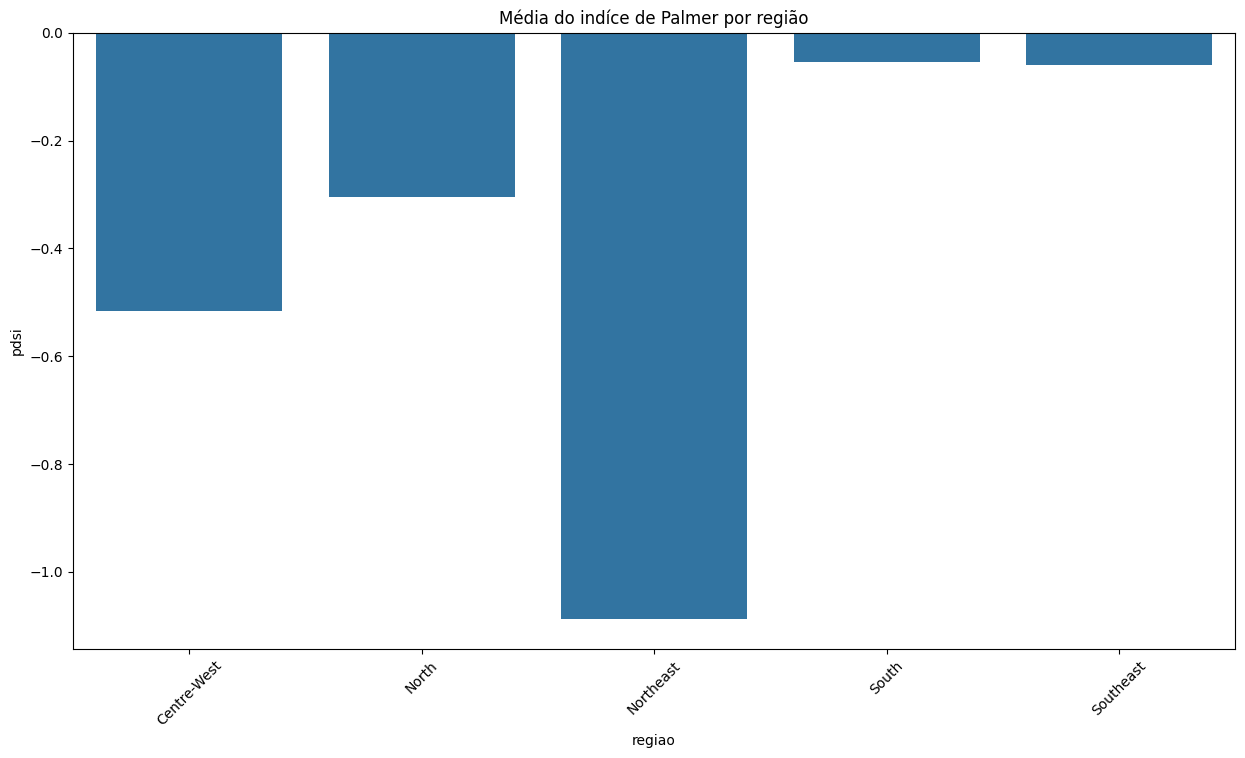

In [29]:
df_pdsi = agrupar_pela_media(df, 'regiao', 'pdsi')
grafico_barras(df_pdsi, 'regiao', 'pdsi', 'Média do indíce de Palmer por região')

<h2>Análise</h2>
<p>A média do índice de seca no nosso país está entre a classificação normal e uma seca suave. As regiões sul e sudeste estão mais próximas do normal classificadas até com uma umidade inicial. Já as regiões nordeste e centro-oeste estão mais próximas de uma classificação de seca suave.</p>
<p>Comparando os casos de dengue dessa região podemos concluir que a região sudeste tem um maior índice de casos, mas se comparado com a região sul ambas tem praticamente a mesma média do índice de Palmer, eram para elas terem uma mesma quantidade de casos de dengue, contudo a população também deve ser levada em conta e a população da região sudeste é bem maior do que a região sul, então por isso não podemos descartar a relação entre PDSI e casos de dengue.</p>
<p>Agora olhando para regiões mais secas como nordeste e centro-oeste essas regiões também tiveram uma grande ocorrência de casos de dengue e são classificadas pelo indíce de Palmer como regiões mais secas.</p>

<h1>Conclusão</h1>
<p>Vimos nos dados analisados que fatores como clima e o índice de seca de Palmer tem sim uma certa influência nos casos de dengue. Regiões mais chuvosas como sudeste, tem tendência a ter mais casos de dengue. Porém, vimos também regiões como nordeste e centro-oeste que são regiões de clima mais seco e com menos ocorrência de chuvas sendo a segunda e terceira respectivamente no ranking de quantidade de casos de dengue.</p>
<p>Outro atributo que não podemos desconsiderar é a população das regiões, uma vez que regiões mais populosas terão mais casos de dengue. Imagino que é o que acontece com a região sudeste, ela é a região mais populosa do país e é também onde temos mais ocorrências de casos de dengue. Contudo, há casos como, por exemplo, a região sul que é mais populosa que a região centro oeste do país, porém, a região centro-oeste tem muito mais casos de dengue do que a região sul.</p>
<p>Por fim, a análise que podemos ter é que outros atributos estão influênciando nos casos de dengue do Brasil e não só o clima ou a seca. Atributos como presença ou não de saneamento básico, fatores socioeconômicos como reda per capita, PIB de cada estado, investimento em políticas públicas de prevenção, entre outros. Mas, infelizmente esse conjunto de dados só abarcou dados referente ao clima como PDSI, clima das regiões e a água.</p>
<p>Ainda sim, acredito que é válido a realização de um modelo de predição que nos dê uma projeção para o futuro para termos uma ideia da quantidade de casos que teremos que lidar no futuro e assim alertar a população a cobrar do estado a realização de políticas públicas de prevenção e investimento em infraestrutura para a diminuição de criadores do mosquito aedes aegypti.</p>

<h1>Clusterização</h1>

In [9]:
import math
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126996 entries, 6696 to 133919
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   nome                    126996 non-null  object 
 1   estado                  126996 non-null  object 
 2   regiao                  126996 non-null  object 
 3   bioma                   126996 non-null  object 
 4   ecozona                 126996 non-null  object 
 5   clima_principal         126996 non-null  object 
 6   mes                     126996 non-null  int64  
 7   ano                     126996 non-null  int64  
 8   casos_dengue            126996 non-null  float64
 9   populacao               126996 non-null  float64
 10  densidade_populacional  126996 non-null  float64
 11  temp_max                126996 non-null  float64
 12  temp_min                126996 non-null  float64
 13  pdsi                    126996 non-null  float64
 14  pop_urbana            

<h2>Aplicando o método do cotovelo</h2>
<p>Estamos tentando encontrar qual a melhor quantidade de clusters para o conjunto de dados analisados.</p>
<p>Vamos usar uma função que recebe um conjunto de dados, calcula o Kmeans para 19 quantidade de clusters que vão de 2 a 20 possíveis agrupamentos e retorna uma lista com os valores de WCSS.</p>

In [11]:
def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

<h3>Cálculo da distância de um ponto até uma reta</h3>
<p>Esse método recebe como parâmetro uma lista contendo a soma dos quadrados para cada quantidade de clusters. E retorna a quantidade ótima de clusters</p>

In [14]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

<h2>Aplicando o K-means</h2>

C:\Users\Bernardo\AppData\Local\Temp\ipykernel_10624\3262423400.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['cluster'] = clusters


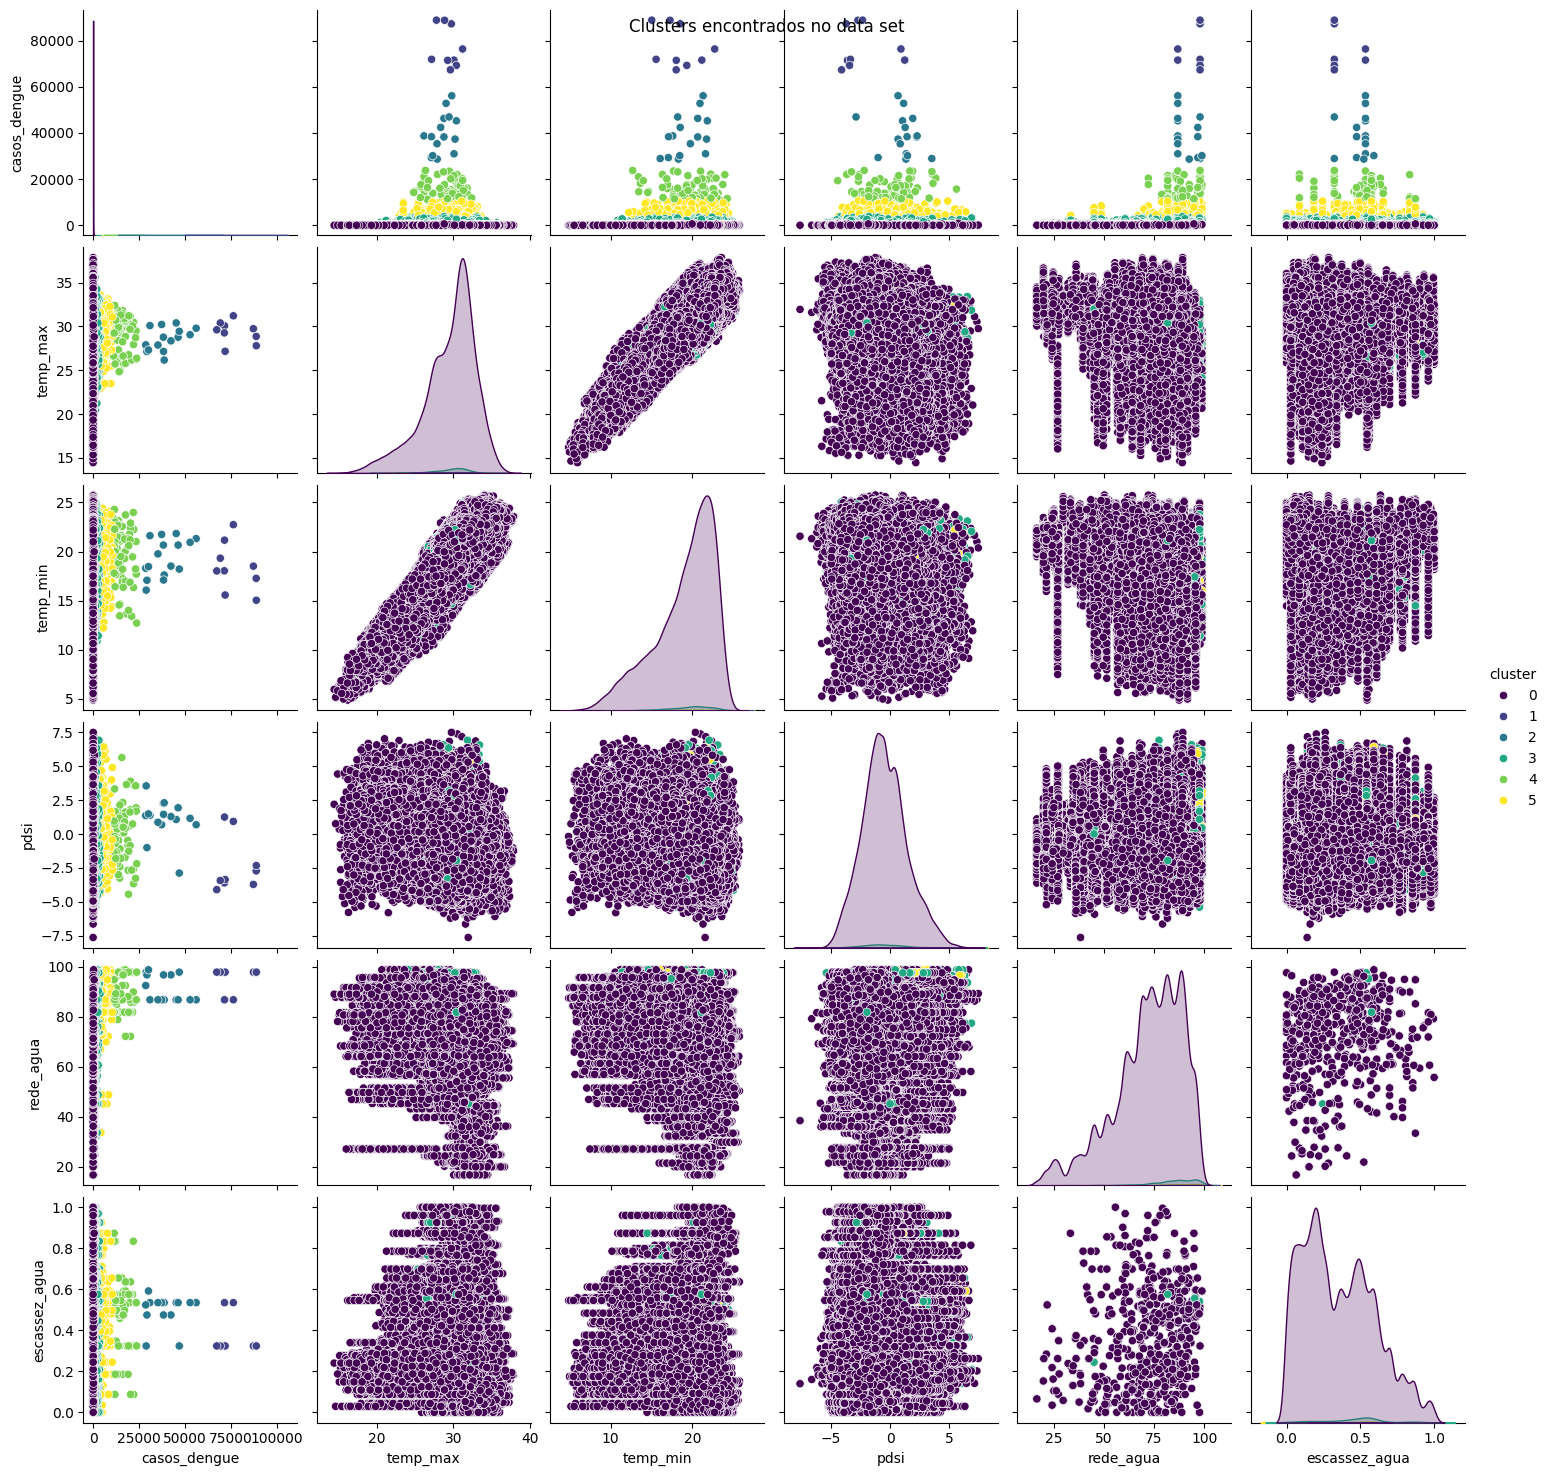

In [15]:
# Preparando os dados
df_numerico = df[['casos_dengue', 'temp_max', 'temp_min', 'pdsi', 'rede_agua', 'escassez_agua']]
dff = df_numerico

# Calculando a soma dos quadrados para 19 quantidade de clusters
soma_dos_quad = calculate_wcss(df_numerico)

# Calculando a quantidade ótima de clusters
n = optimal_number_of_clusters(soma_dos_quad)

# Rodando o kmeans com quantidade ótima de clusters
kmeans = KMeans(n_clusters=n)
kmeans.fit(df_numerico)
clusters = kmeans.fit_predict(df_numerico)

# Adicionando os clusters encontrados ao dataframe
dff['cluster'] = clusters

# Visualizando os clusters encontrados
sns.pairplot(dff, hue='cluster', palette='viridis')
plt.suptitle('Clusters encontrados no data set')
plt.show()